Name: Qiyue Chen 

Github page: https://github.com/qchen4/EE399A

In [ ]:
import scipy.optimize as opt
import numpy as np
import matplotlib.pyplot as plt
import copy

import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable

from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# For Progress Bar
from tqdm import tqdm

In [ ]:
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
print(device)

cuda


In [ ]:
# Problem I
# Part (i)
# Define the data
X = np.arange(0, 31)
Y = np.array([30, 35, 33, 32, 34, 37, 39, 38, 36, 36, 37, 39, 42, 45, 45, 41,
              40, 39, 42, 44, 47, 49, 50, 49, 46, 48, 50, 53, 55, 54, 53])

Xmean, Xstd  = X.mean(), X.std()
Ymean, Ystd  = Y.mean(), Y.std()

X = (X - Xmean) / Xstd
Y = (Y - Ymean) / Ystd

# Split the data into training and test sets
X_train, Y_train = X[:20], Y[:20]
X_test, Y_test = X[20:], Y[20:]

In [ ]:
# Convert data to PyTorch tensors
X_train_tensor = Variable(torch.Tensor(X_train).unsqueeze(1))
Y_train_tensor = Variable(torch.Tensor(Y_train).unsqueeze(1))
X_test_tensor = Variable(torch.Tensor(X_test).unsqueeze(1))
Y_test_tensor = Variable(torch.Tensor(Y_test).unsqueeze(1))

# Define the three layer neural network model
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.layers = nn.Sequential(
          nn.Linear(1, 1024),
          nn.ReLU(),
          nn.Linear(1024, 1)
        )

    def forward(self, x):
        x = self.layers(x)
        return x

# Create an instance of the model
net = Net().to(device)

# Define the loss function
criterion = torch.nn.MSELoss()

# Define the optimizer
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)

# Part (ii)
# Train the model
num_epochs = 10000
train_losses = []
test_losses = []
for epoch in range(num_epochs):
    # Forward pass
    outputs = net(X_train_tensor.unsqueeze(1).to(device))
    loss = criterion(outputs, Y_train_tensor.unsqueeze(1).to(device))

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Compute training and test loss for monitoring
    train_losses.append(loss.item())
    test_outputs = net(X_test_tensor.unsqueeze(1).to(device))
    test_loss = criterion(test_outputs, Y_test_tensor.unsqueeze(1).to(device))
    test_losses.append(test_loss.item())

    # Print progress
    if (epoch+1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

Epoch [1000/10000], Training Loss: 0.0010, Test Loss: 2.1492
Epoch [2000/10000], Training Loss: 0.0002, Test Loss: 2.1339
Epoch [3000/10000], Training Loss: 0.0001, Test Loss: 2.0596
Epoch [4000/10000], Training Loss: 0.0003, Test Loss: 1.2619
Epoch [5000/10000], Training Loss: 0.0000, Test Loss: 0.9773
Epoch [6000/10000], Training Loss: 0.0030, Test Loss: 1.4434
Epoch [7000/10000], Training Loss: 0.0000, Test Loss: 0.9890
Epoch [8000/10000], Training Loss: 0.0002, Test Loss: 0.7116
Epoch [9000/10000], Training Loss: 0.0000, Test Loss: 0.9621
Epoch [10000/10000], Training Loss: 0.0000, Test Loss: 0.8680


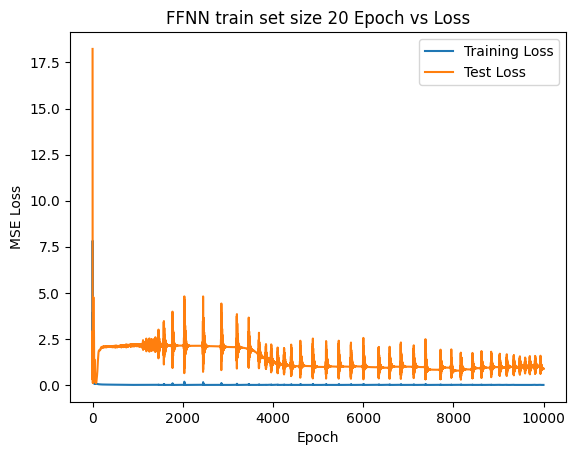

In [ ]:
# Plot the loss curve
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.title('FFNN train set size 20 Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

In [ ]:
print(X)

[-1.67705098 -1.56524758 -1.45344419 -1.34164079 -1.22983739 -1.11803399
 -1.00623059 -0.89442719 -0.78262379 -0.67082039 -0.55901699 -0.4472136
 -0.3354102  -0.2236068  -0.1118034   0.          0.1118034   0.2236068
  0.3354102   0.4472136   0.55901699  0.67082039  0.78262379  0.89442719
  1.00623059  1.11803399  1.22983739  1.34164079  1.45344419  1.56524758
  1.67705098]


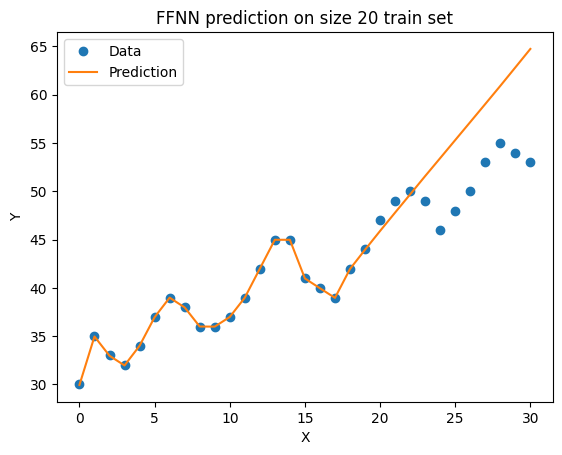

In [ ]:
# De-normalize the predicted output
X_tensor = Variable(torch.Tensor(X).unsqueeze(1))
Y_pred1 = net(X_tensor.to(device)).cpu().detach().numpy() * Ystd + Ymean


# Plot the predicted curve with de-normalized data
plt.plot(X * Xstd + Xmean, Y * Ystd + Ymean, 'o', label='Data')
plt.plot(X * Xstd + Xmean, Y_pred1, label='Prediction')
plt.title('FFNN prediction on size 20 train set')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [ ]:
# Part (iii)
# Split the data into training and test sets
X_train, Y_train = X[:10], Y[:10]
X_test, Y_test = X[10:], Y[10:]

In [ ]:
# Convert data to PyTorch tensors
X_train_tensor = Variable(torch.Tensor(X_train).unsqueeze(1))
Y_train_tensor = Variable(torch.Tensor(Y_train).unsqueeze(1))
X_test_tensor = Variable(torch.Tensor(X_test).unsqueeze(1))
Y_test_tensor = Variable(torch.Tensor(Y_test).unsqueeze(1))

# Define the neural network model
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.layers = nn.Sequential(
          nn.Linear(1, 1024),
          nn.ReLU(),
          nn.Linear(1024, 1)
        )

    def forward(self, x):
        x = self.layers(x)
        return x

# Create an instance of the model
net = Net().to(device)

# Define the loss function
criterion = torch.nn.MSELoss()

# Define the optimizer
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)

# Train the model
num_epochs = 10000
train_losses = []
test_losses = []
for epoch in range(num_epochs):
    # Forward pass
    outputs = net(X_train_tensor.unsqueeze(1).to(device))
    loss = criterion(outputs, Y_train_tensor.unsqueeze(1).to(device))

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Compute training and test loss for monitoring
    train_losses.append(loss.item())
    test_outputs = net(X_test_tensor.unsqueeze(1).to(device))
    test_loss = criterion(test_outputs, Y_test_tensor.unsqueeze(1).to(device))
    test_losses.append(test_loss.item())

    # Print progress
    if (epoch+1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

Epoch [1000/10000], Training Loss: 0.0004, Test Loss: 6.5870
Epoch [2000/10000], Training Loss: 0.0000, Test Loss: 5.3239
Epoch [3000/10000], Training Loss: 0.0000, Test Loss: 5.0323
Epoch [4000/10000], Training Loss: 0.0002, Test Loss: 4.6923
Epoch [5000/10000], Training Loss: 0.0005, Test Loss: 5.4860
Epoch [6000/10000], Training Loss: 0.0000, Test Loss: 5.2829
Epoch [7000/10000], Training Loss: 0.0000, Test Loss: 5.2881
Epoch [8000/10000], Training Loss: 0.0000, Test Loss: 5.3138
Epoch [9000/10000], Training Loss: 0.0000, Test Loss: 4.2023
Epoch [10000/10000], Training Loss: 0.0000, Test Loss: 4.3455


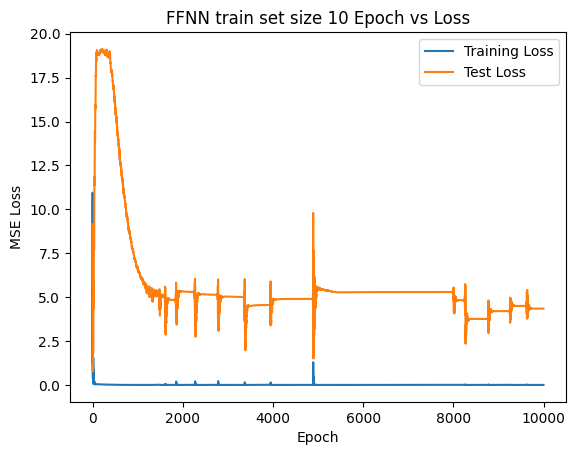

In [ ]:
# Plot the loss curve
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.title('FFNN train set size 10 Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

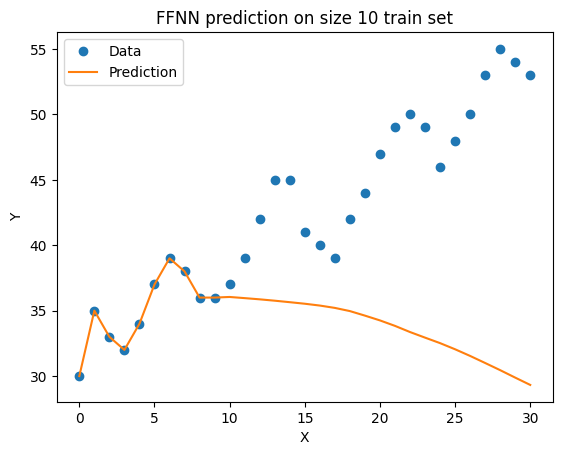

In [ ]:
# De-normalize the predicted output
X_tensor = Variable(torch.Tensor(X).unsqueeze(1))
Y_pred2 = net(X_tensor.to(device)).cpu().detach().numpy() * Ystd + Ymean

# Plot the predicted curve with de-normalized data
plt.plot(X * Xstd + Xmean, Y * Ystd + Ymean, 'o', label='Data')
plt.plot(X * Xstd + Xmean, Y_pred2, label='Prediction')
plt.title('FFNN prediction on size 10 train set')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [ ]:
# Part (iv)

The minimum error is 8.867922244314473
The parameters A, B, C, D are [ 2.17168187  0.9093249   0.73247849 31.4529185 ]


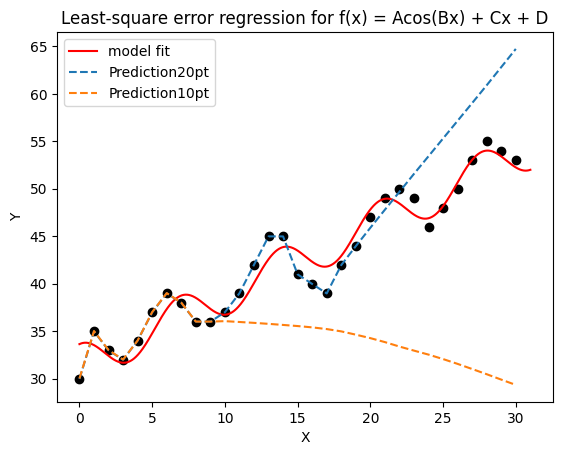

In [ ]:
# Model fit from HW1
X=np.arange(0,31)
Y=np.array([30, 35, 33, 32, 34, 37, 39, 38, 36, 36, 37, 39, 42, 45, 45, 41, 40, 39, 42, 44, 47, 49, 50, 49, 46, 48, 50, 53, 55, 54, 53])

def velfit(c, x, y):
    e2 = np.sqrt(np.sum((c[0]*np.cos(c[1]*x)+c[2]*x+c[3]-y)**2))
    return e2

v0 = np.array([3, 1*np.pi/4, 2/3, 32])   # 3 pi/4 2/3 32

res= opt.minimize(velfit, v0, args=(X, Y), method='Nelder-Mead')

c = res.x
print('The minimum error is' , velfit(c, X, Y))
print('The parameters A, B, C, D are', c)

x2 = np.arange(0, 31.01, 0.01)
yfit2 = (c[0]*np.cos(c[1]*x2)+c[2]*x2+c[3])

plt.plot(np.arange(0, 31), Y, 'ko')
plt.plot(x2, yfit2, 'r-', label='model fit')
plt.plot(X, Y_pred1, "--", label='Prediction20pt')
plt.plot(X, Y_pred2, "--", label='Prediction10pt')
plt.title('Least-square error regression for f(x) = Acos(Bx) + Cx + D')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

HW1's model fit is obviously better

Problem II:

In [ ]:
# Part (i)
# Load MNIST dataset
mnist = fetch_openml('mnist_784')
X = mnist.data.astype('float32') / 255.
y = mnist.target.astype('int')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
X = np.array(X)
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Perform PCA analysis on the images
pca = PCA(n_components=20)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Visualize the first 20 PCA modes
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(10, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(28, 28), cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('PC %d' % (i+1))

# Add overall title
plt.suptitle('PCA Analysis: Visualization of the First 20 PCA Modes', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


In [ ]:
print(X_train_pca.shape)

In [ ]:
# Part(ii)
# Convert data to PyTorch tensors
X_train_pca = torch.from_numpy(X_train_pca).float()
X_test_pca = torch.from_numpy(X_test_pca).float()
y_train = torch.from_numpy(y_train).long()
y_test = torch.from_numpy(y_test).long()

In [ ]:
# Define the neural network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(20, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.fc1(x)
        x = nn.functional.dropout(x, p=0.2)
        x = nn.functional.relu(self.fc2(x))
        x = nn.functional.dropout(x, p=0.2)
        x = nn.functional.relu(self.fc3(x))
        x = nn.functional.dropout(x, p=0.2)
        x = self.fc4(x)
        return nn.functional.log_softmax(x, dim=1)

# Initialize the neural network
model = Net().to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

# Train the neural network
for epoch in tqdm(range(10000), desc='Training', unit='epoch', unit_scale=True, ncols=80, bar_format='{l_bar}{bar:30}{r_bar}{bar:-10b}'):
    optimizer.zero_grad()
    output = model(X_train_pca.to(device))
    loss = criterion(output, y_train.to(device))
    loss.backward()
    optimizer.step()
    if epoch % 100 ==0:
      print(" Epoch: {:d}, Loss: {:.4f}".format(epoch+1, loss.item()))

# Evaluate the model on the test set
with torch.no_grad():
    output = model(X_test_pca.to(device))
    y_pred = torch.argmax(output, dim=1)
    accuracy = accuracy_score(y_test, y_pred.cpu())
    print("Accuracy: {:.2f}%".format(accuracy * 100))


In [ ]:
# Reshape the data for the LSTM network
X_train_lstm = X_train.reshape((X_train.shape[0], 28, 28))
X_test_lstm = X_test.reshape((X_test.shape[0], 28, 28))

X_train_lstm = torch.tensor(X_train_lstm, dtype = torch.float32,  requires_grad = True)
X_test_lstm = torch.tensor(X_test_lstm, dtype = torch.float32,  requires_grad = True)
class LSTMNet(nn.Module):
    def __init__(self):
        super(LSTMNet, self).__init__()
        self.lstm1 = nn.LSTM(28, 128, batch_first=True)
        self.fc1 = nn.Linear(128, 10)

    def forward(self, x):
        x, _ = self.lstm1(x)
        x = x[:, -1, :]
        x = self.fc1(x)
        return nn.functional.log_softmax(x, dim=1)

# Initialize the LSTM network
lstm_model = LSTMNet().to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(lstm_model.parameters())

# Train the LSTM network
for epoch in range(20):
    optimizer.zero_grad()
    output = lstm_model(X_train_lstm.to(device))
    loss = criterion(output, y_train.to(device))
    loss.backward()
    optimizer.step()
    print("Epoch: {:d}, Loss: {:.4f}".format(epoch+1, loss.item()))

# Evaluate the LSTM model on the test set
with torch.no_grad():
    output = lstm_model(X_test_lstm.to(device))
    y_pred = torch.argmax(output, dim=1)
    accuracy = accuracy_score(y_test, y_pred.cpu())
    print("LSTM Accuracy: {:.2f}%".format(accuracy * 100))


In [ ]:
# Train a SVM classifier
svm_model = SVC()
svm_model.fit(X_train_pca, y_train)
y_pred = svm_model.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print("SVM Accuracy: {:.2f}%".format(accuracy * 100))


In [ ]:
# Train a decision tree classifier
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train_pca, y_train)
y_pred = tree_model.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Accuracy: {:.2f}%".format(accuracy * 100))
